###LOADING DATASETS AND LIBRARIES



*   Importing the necessary python libraries for statistical modeling




In [6]:
import sys   # libraries
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandas_profiling
sns.set()
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


*   Loading in German Credit Dataset






In [7]:
from google.colab import files  # to open the file
uploaded = files.upload()

Saving german_credit.csv to german_credit (1).csv


In [11]:
df = pd.read_csv('german_credit.csv')
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Creditability,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
Account Balance,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
Duration of Credit (month),1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Payment Status of Previous Credit,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
Purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
Credit Amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Value Savings/Stocks,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
Length of current employment,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
Instalment per cent,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Sex & Marital Status,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0


#PREDICTIVE MODELLING



##1.  CLEAN DATA




#####FEATURE SELECTION FOR MACHINE LEARNING

In [14]:
# choose certain variables for modelling
SelectedColumns =['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'No of dependents', 'Foreign Worker']

In [15]:
# Selecting final columns
MySelectedData=df[SelectedColumns]
MySelectedData.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,No of dependents,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,2,21,3,1,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,1,36,3,1,2,2,1
2,1,2,12,2,9,841,2,4,2,2,1,1,23,3,1,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,1,39,3,1,2,2,2
4,1,1,12,4,0,2171,1,3,4,3,1,2,38,1,2,2,1,2


In [16]:
# Printing all the column names for our reference
MySelectedData.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Most valuable available asset', 'Age (years)', 'Concurrent Credits',
       'Type of apartment', 'No of Credits at this Bank', 'No of dependents',
       'Foreign Worker'],
      dtype='object')

In [17]:
# maame version
# removed Duration current address, Occupation, Telephone
DepVariable= 'Creditability'
IndVariable=['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Most valuable available asset', 'Age (years)', 'Concurrent Credits',
       'Type of apartment', 'No of Credits at this Bank', 'No of dependents',
       'Foreign Worker']

X=df[IndVariable].values
y=df[DepVariable].values

#####TRAINING DATA FOR PREDICTION

In [18]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=428)

In [19]:
# Check samples
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(900, 17)
(900,)
(100, 17)
(100,)


####DECISION TREE

In [20]:
from sklearn import tree
Mytree = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')
# Creating the model on Training Data
DTree=Mytree.fit(X_train,y_train)
prediction=DTree.predict(X_test)

In [21]:
# Evaluation Matrix
print('CLEAN DATA: DECISION TREE EVALUATION MATRIX:')
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

CLEAN DATA: DECISION TREE EVALUATION MATRIX:
              precision    recall  f1-score   support

           0       0.70      0.57      0.63        28
           1       0.84      0.90      0.87        72

    accuracy                           0.81       100
   macro avg       0.77      0.74      0.75       100
weighted avg       0.80      0.81      0.80       100



In [22]:
print('CLEAN DATA: DECISION TREE CONFUSION MATRIX:')
print(metrics.confusion_matrix(y_test, prediction))


CLEAN DATA: DECISION TREE CONFUSION MATRIX:
[[16 12]
 [ 7 65]]


Accuracy of the model on Testing Sample Data: 0.8

Accuracy values  Cross Validation:
 [0.71225296 0.76902287 0.74604343 0.68503119 0.69011858 0.77519841
 0.77229833 0.69398679 0.61170635 0.63822844]

Final Average Accuracy of the model: 0.71


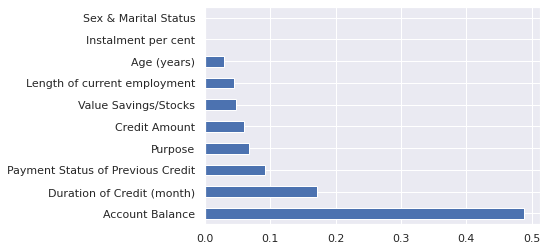

In [23]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=IndVariable)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score


Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values  Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
#Installing the required library for plotting the decision tree
#!pip install dtreeplt

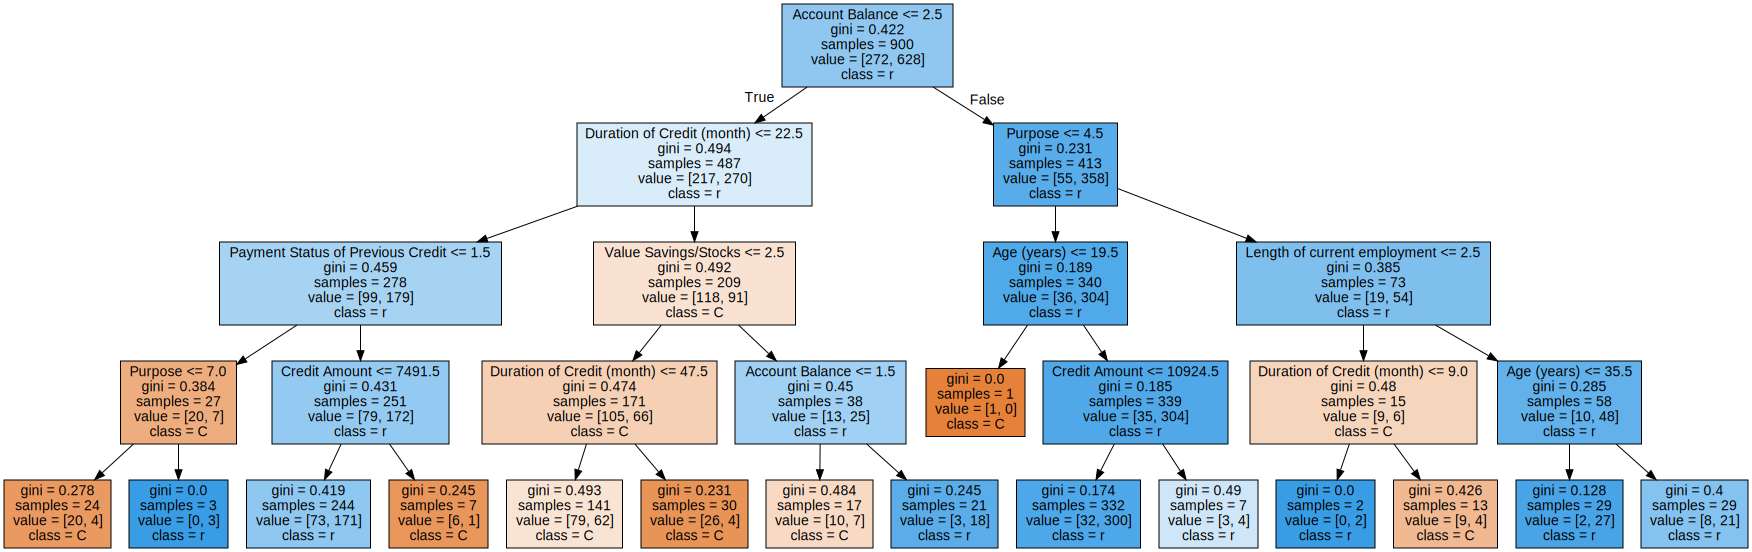

In [24]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(Mytree, out_file=None, 
                                feature_names=IndVariable,  
                                class_names=DepVariable,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

####NAIVE BAYES

In [25]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
mybayes = MultinomialNB()

In [27]:
NBmodel=mybayes.fit(X_train,y_train)
prediction=NBmodel.predict(X_test)
# Evaluation matrix, Accuracy, Precision, Recall
print('CLEAN DATA: NAIVES BAYES EVALUATION MATRIX:')
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

CLEAN DATA: NAIVES BAYES EVALUATION MATRIX:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43        28
           1       0.78      0.78      0.78        72

    accuracy                           0.68       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.68      0.68      0.68       100



In [29]:
print(metrics.confusion_matrix(y_test, prediction))

[[12 16]
 [16 56]]
